In [6]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sift_results = pd.read_csv('result-small.csv')
sift_results

,generation,method,max_deg,size_construction,size_search,alpha,build_time,memory,search_time,recall
0,0,multi-cutcat-tour,117,882,522,1.242188,1.114445,0.000000,0.002696,1.0000
1,0,multi-cutcat-tour,831,221,777,1.791992,0.799844,0.000000,0.004068,1.0000
2,0,multi-cutcat-tour,797,638,879,1.737305,2.861793,0.004964,0.005291,1.0000
3,0,multi-cutcat-tour,475,976,151,1.376953,1.290311,0.000000,0.002894,1.0000
4,0,multi-cutcat-tour,55,262,757,1.602539,0.796725,0.000000,0.002743,1.0000
...,...,...,...,...,...,...,...,...,...,...
59,10,multi-cutcat-tour,467,111,485,1.197266,0.213268,0.000000,0.001876,1.0000
60,10,multi-cutcat-tour,211,111,229,1.197266,0.215081,0.000000,0.001353,0.9996
61,10,multi-cutcat-tour,211,110,197,1.134766,0.205469,0.000000,0.001152,0.9994
62,10,multi-cutcat-tour,209,178,357,1.197266,0.294060,0.000000,0.001571,1.0000


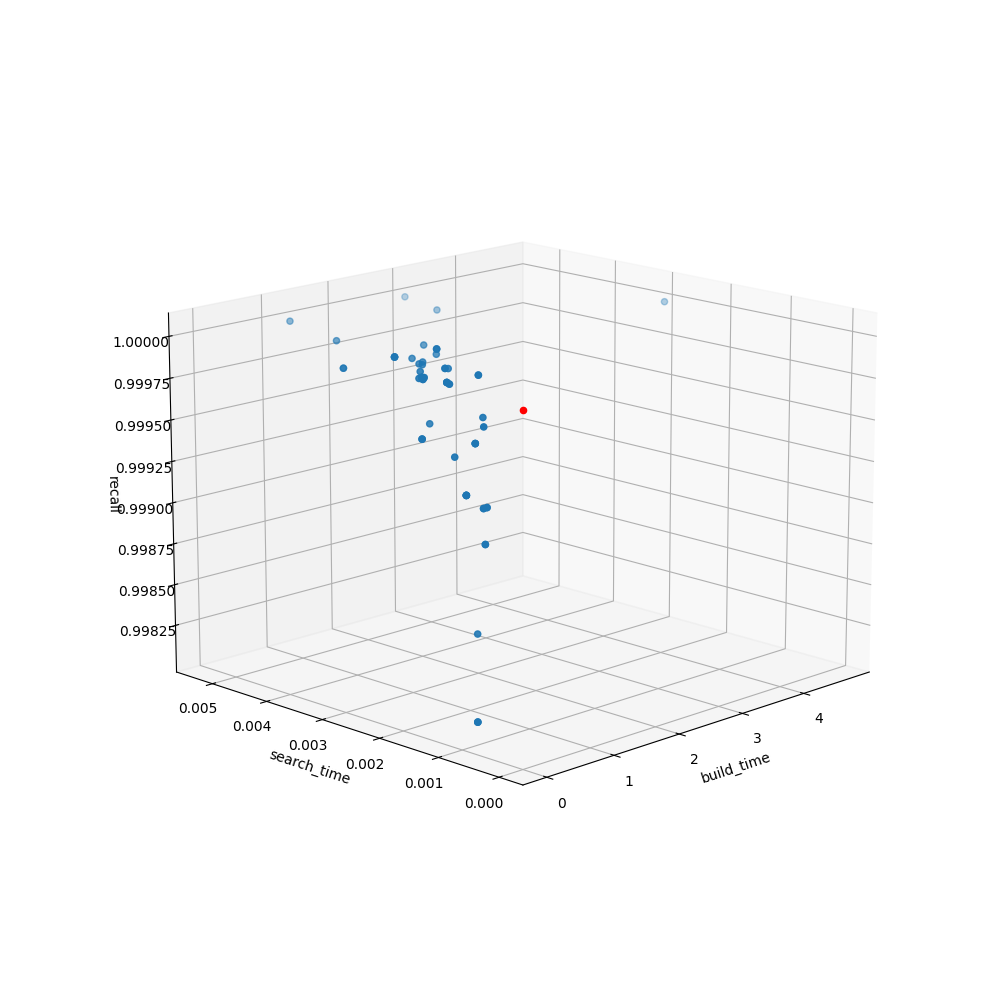

In [7]:
plt.figure(figsize=(10, 10))
axes = plt.axes(projection='3d')
axes.scatter3D(sift_results['build_time'], sift_results['search_time'], sift_results['recall'])
axes.scatter3D([0.0], [0.0], [1.0], c='r')
axes.set_xlabel('build_time')
axes.set_ylabel('search_time')
axes.set_zlabel('recall')
axes.view_init(elev=15, azim=225)
plt.savefig('./images/m3/3d-bsr.png')
plt.show()

In [8]:
def distance_from_perfection(data_point: np.ndarray):
    build_time = data_point[5]
    search_time = data_point[7]
    recall = data_point[8]

    total_weight = np.array([1, 2, 3])
    squared_error = np.array([build_time ** 2, search_time ** 2, (recall - 1) ** 2])
    return squared_error @ total_weight

# sift_results.to_numpy()

In [9]:
sorted_res = sorted(sift_results.to_numpy(), key=distance_from_perfection)
top10 = pd.DataFrame(sorted_res[:10], columns=sift_results.columns).drop("memory", axis=1)
top10["WS"] = [distance_from_perfection(e) for e in sorted_res[:10]]
top10

,generation,method,max_deg,size_construction,size_search,alpha,build_time,search_time,recall,WS
0,1,multi-cutcat-tour,407,882,520,1.071289,0.723149,0.002096,1.0000,4.135099
1,2,multi-cutcat-tour,407,882,520,1.071289,0.723149,0.002096,1.0000,4.135099
2,8,multi-cutcat-tour,211,111,133,1.072266,0.216291,0.000986,0.9981,4.143841
3,9,multi-cutcat-tour,211,111,133,1.072266,0.216291,0.000986,0.9981,4.143841
4,10,multi-cutcat-tour,211,111,133,1.072266,0.216291,0.000986,0.9981,4.143841
5,2,multi-cutcat-tour,407,978,520,1.085938,0.742302,0.002063,1.0000,4.166894
6,3,multi-cutcat-tour,979,464,150,1.126953,0.511040,0.003599,0.9999,4.248466
7,4,multi-cutcat-tour,979,464,150,1.126953,0.511040,0.003599,0.9999,4.248466
8,2,multi-cutcat-tour,983,466,150,1.126953,0.501295,0.002233,0.9996,4.256641
9,4,multi-cutcat-tour,983,466,150,1.126953,0.501295,0.002233,0.9996,4.256641


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


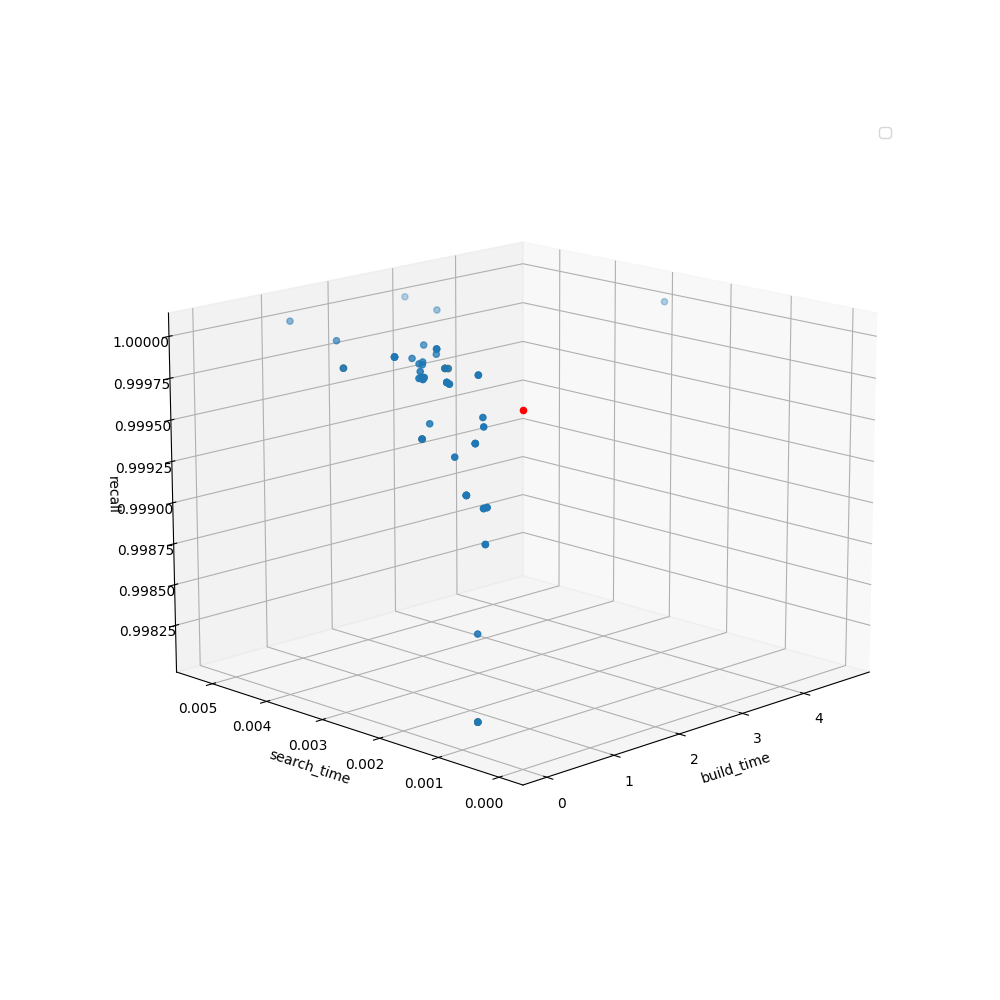

In [10]:
plt.figure(figsize=(10, 10))
axes = plt.axes(projection='3d')

# sift_results = sift_results.groupby("generation").mean()
axes.scatter3D(sift_results['build_time'], sift_results['search_time'], sift_results['recall'])
axes.scatter3D([0.0], [0.0], [1.0], c='r')
axes.scatter3D(top10['build_time'], top10['search_time'], top10['recall'], c="orange")

axes.set_xlabel('build_time')
axes.set_ylabel('search_time')
axes.set_zlabel('recall')
axes.view_init(elev=15, azim=225)
plt.savefig('./images/m3/3d-top10.png')
plt.legend()
plt.show()